In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import fudebako

In [2]:
fudebako.set_data(
    "data/s_20180621-22.pickle",
    "data/op1_20180621-22.pickle",
    "data/op2_20180621-22.pickle",
)

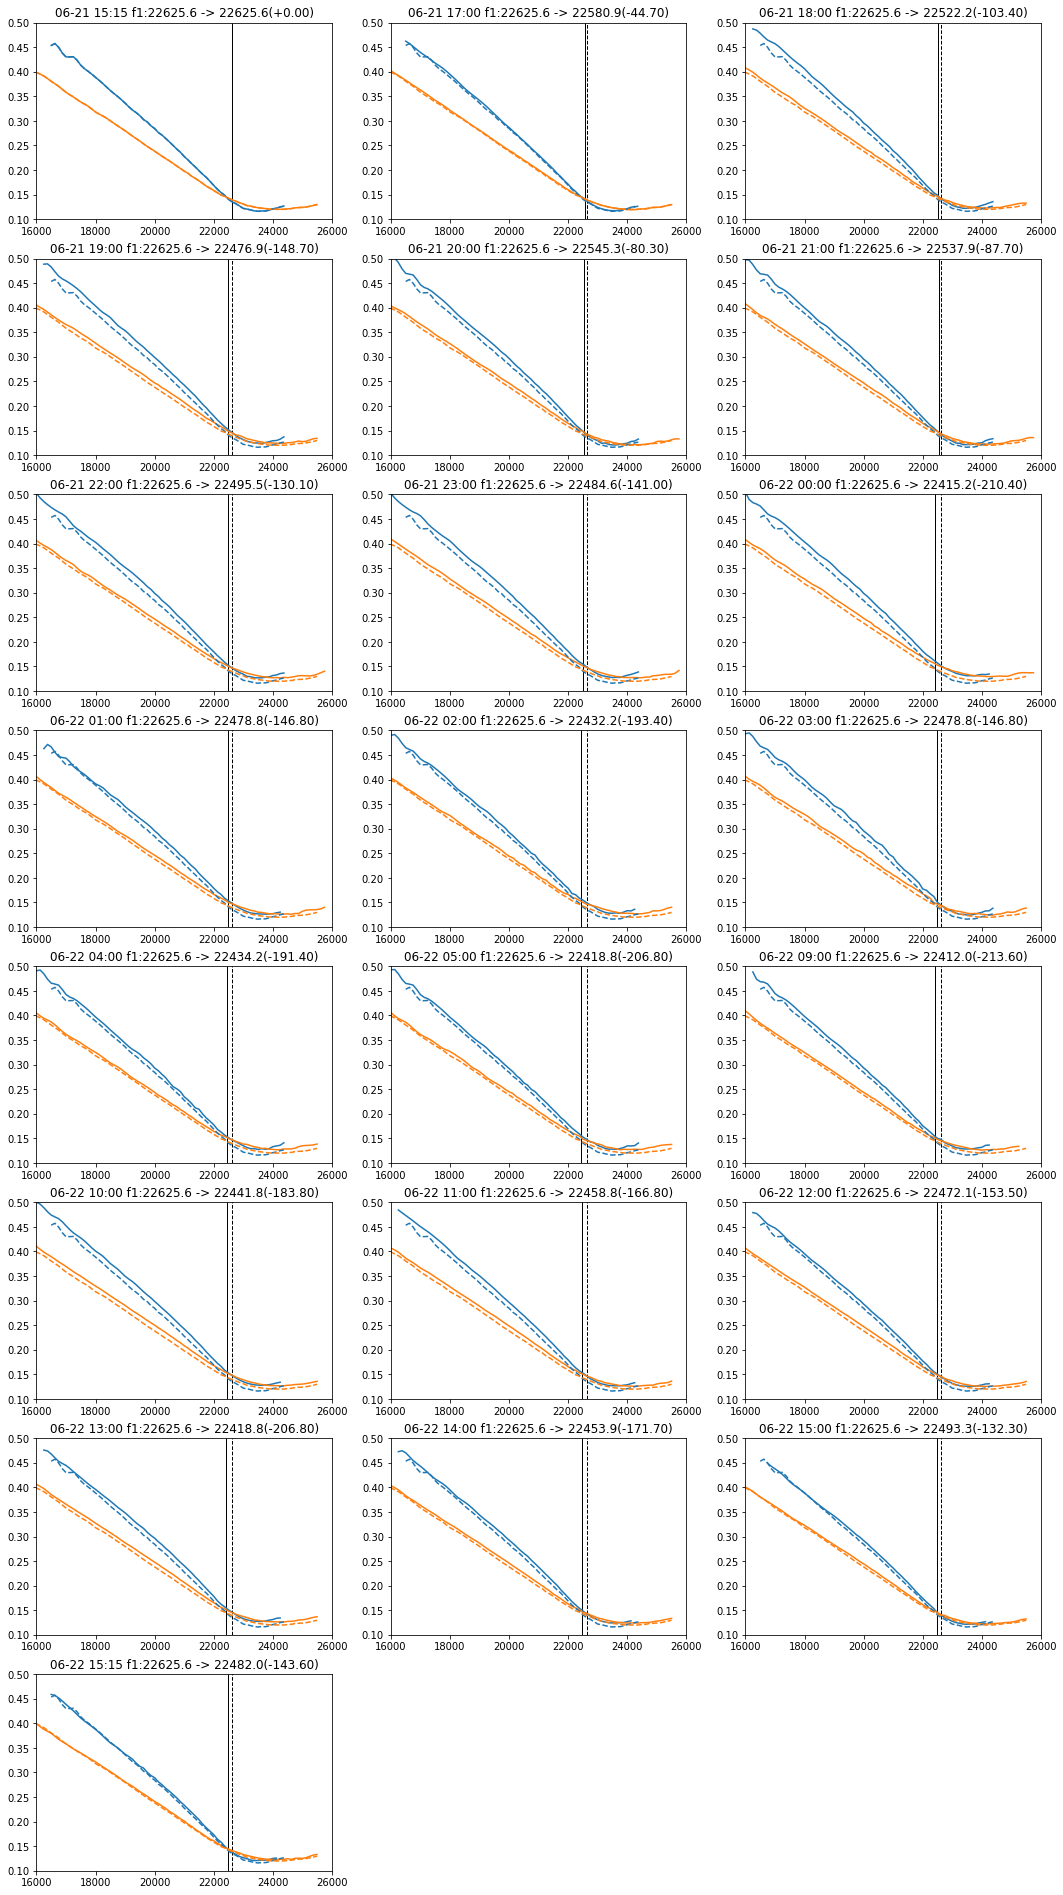

In [3]:
fig = plt.figure(figsize=(18, 34))
ax = [fig.add_subplot(8, 3, i) for i in range(1, 23)]
prev1, prev2 = fudebako.get_fop_data(fudebako.s_df.index[0])
for i, t0 in enumerate(fudebako.s_df.index):
    prev1_, prev2_ = fudebako.plot_iv(t0, ax[i], prev1, prev2,
                                      x_lim=(16000, 26000), y_lim=(0.1, 0.5))
plt.show()

In [4]:
t0 = fudebako.s_df.index[0]
p1 = fudebako.Portfolio()
p1.add(t0, 1, 0, 'P', 22000)
p1.add(t0, -2, 0, 'P', 21000)
display(p1.position[['code', 'qty', 'a_price', 'iv', 'delta', 'gamma', 'vega', 'theta']])
print(p1.position[['delta', 'gamma', 'vega', 'theta']].sum())

,code,qty,a_price,iv,delta,gamma,vega,theta
0,1803P22000,1.0,135.3310,0.168801,-0.241112,0.334377,1720.955089,-6.666003
1,1803P21000,-2.0,50.2027,0.227584,0.170289,-0.247979,-1720.741547,8.996098


delta   -0.070823
gamma    0.086399
vega     0.213542
theta    2.330095
dtype: float64


In [5]:
t0 = fudebako.s_df.index[8]
p1.add(t0, 1, 0, 'C', 22750)
p1.add(t0, -2, 0, 'C', 23125)

p1.update(t0)

display(p1.position[['code', 'qty', 'a_price', 'c_price', 'iv', 'delta', 'gamma', 'vega', 'theta']])
print(p1.position[['pl', 'delta', 'gamma', 'vega', 'theta']].sum())

,code,qty,a_price,c_price,iv,delta,gamma,vega,theta
0,1803P22000,1.0,135.3310,215.0820,0.181143,-0.326417,0.366954,1955.828881,-8.266706
1,1803P21000,-2.0,50.2027,84.9097,0.242214,0.253047,-0.316029,-2252.292307,12.745083
2,1803C22750,1.0,180.1810,180.1810,0.146618,0.345124,0.463335,1998.859587,-6.876132
3,1803C23125,-2.0,69.3585,69.3585,0.136128,-0.353334,-0.702423,-2813.484814,8.980247


pl         10.337000
delta      -0.081580
gamma      -0.188163
vega    -1111.088653
theta       6.582492
dtype: float64


In [6]:
t0 = fudebako.s_df.index[-1]
p1.update(t0)
display(p1.position[['code', 'qty', 'a_price', 'c_price', 'iv', 'delta', 'gamma', 'vega', 'theta']])
print(p1.position[['pl', 'delta', 'gamma', 'vega', 'theta']].sum())

,code,qty,a_price,c_price,iv,delta,gamma,vega,theta
0,1803P22000,1.0,135.3310,175.1180,0.173673,-0.292661,0.369363,1842.311232,-7.695240
1,1803P21000,-2.0,50.2027,64.3684,0.233605,0.210019,-0.290525,-1949.142658,10.964028
2,1803C22750,1.0,180.1810,172.5840,0.133176,0.361039,0.524728,2006.946714,-6.465394
3,1803C23125,-2.0,69.3585,62.3317,0.124634,-0.351105,-0.773444,-2768.491688,8.339891


pl        17.912200
delta     -0.072707
gamma     -0.169878
vega    -868.376400
theta      5.143285
dtype: float64
